**TASK 1**


**IRIS FLOWER CLASSIFICATION**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
iris=pd.read_csv('/content/Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Data Preprocessing

In [ ]:
iris.shape  # To check number of rows and columns

(150, 6)

In [ ]:
iris.isnull() ## To check null values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.set_index('Id',inplace=True)

In [ ]:
iris.dtypes  ## To check datatype

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris.rename(columns={'SepalLengthCm':'Sepal Length','SepalWidthCm':'Sepal Width','PetalLengthCm':'Petal Length','PetalWidthCm':'Petal Width'},inplace=True)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
iris.describe()  ## Basic statistics

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
Corr=iris.corr()
Corr

<ipython-input-171-6a398bfcf9af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr=iris.corr()


,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
Species=iris.groupby('Species').count()
Species

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [ ]:
iris.groupby('Species').value_counts()

Species         Sepal Length  Sepal Width  Petal Length  Petal Width
Iris-setosa     4.9           3.1          1.5           0.1            3
                4.3           3.0          1.1           0.1            1
                4.4           2.9          1.4           0.2            1
                5.0           3.4          1.5           0.2            1
                                           1.6           0.4            1
                                                                       ..
Iris-virginica  6.5           3.0          5.8           2.2            1
                              3.2          5.1           2.0            1
                6.7           2.5          5.8           1.8            1
                              3.0          5.2           2.3            1
                7.9           3.8          6.4           2.0            1
Length: 147, dtype: int64

In [ ]:
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Data Visualisation

<Axes: xlabel='Sepal Length', ylabel='Sepal Width'>

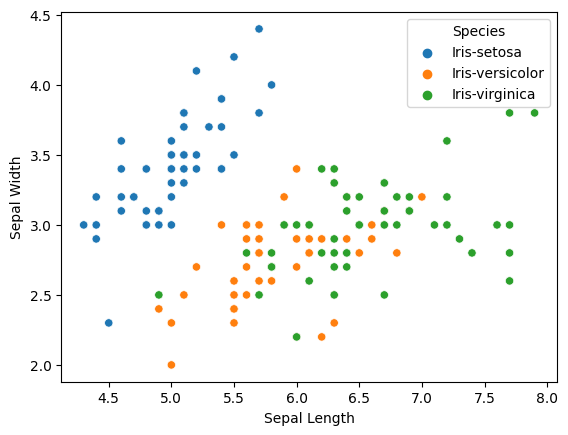

In [ ]:
sns.scatterplot(data=iris,x='Sepal Length',y='Sepal Width',hue='Species')

<Axes: xlabel='Petal Length', ylabel='Petal Width'>

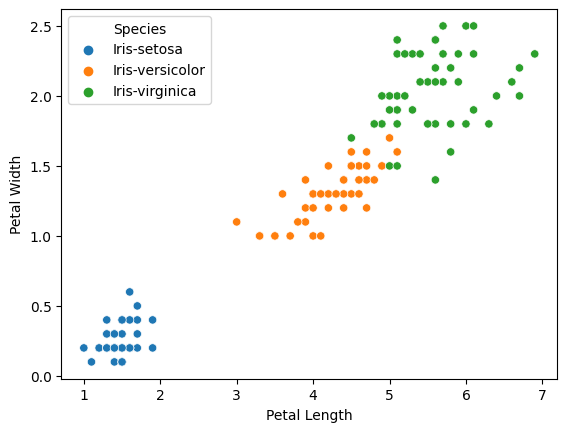

In [ ]:
sns.scatterplot(data=iris,x='Petal Length',y='Petal Width',hue='Species')

<Axes: xlabel='Species', ylabel='Sepal Length'>

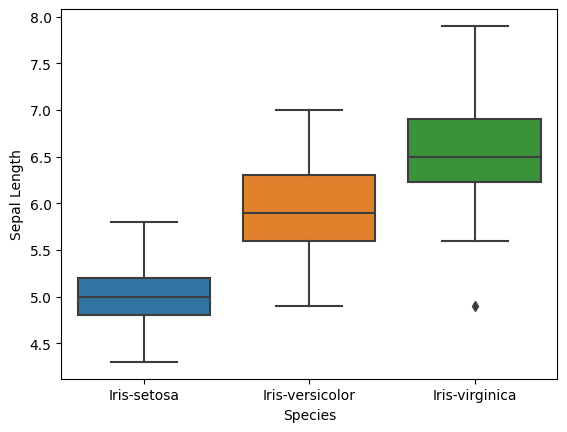

In [ ]:
sns.boxplot(x='Species',y='Sepal Length',data=iris)

<Axes: >

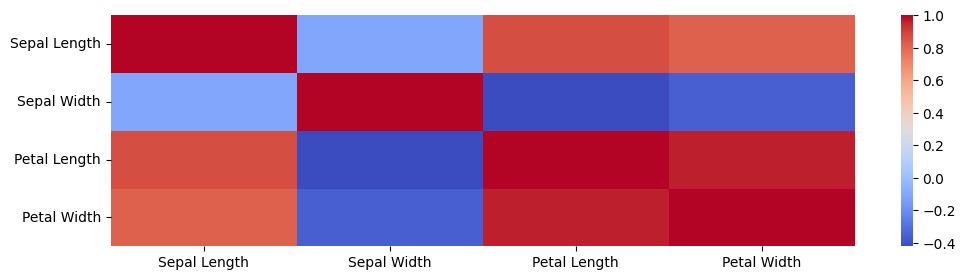

In [ ]:
plt.figure(figsize=[12,3])
sns.heatmap(Corr,cmap='coolwarm')

Model Fitting

In [ ]:
## Define X and Y
X=iris.drop('Species',axis=1)
Y=iris['Species']

Logistic Regression Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [ ]:
Model=LogisticRegression()

To fit model on training dataset

In [ ]:
Model.fit(x_train,y_train)

LogisticRegression()

To check Accuracy score

In [ ]:
Accuracy=Model.score(x_test,y_test)
Accuracy

0.9777777777777777

Decision Tree Classifier

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7)

In [ ]:
model=DecisionTreeClassifier()

Fit the model on trainin data

In [ ]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Prediction on testing data

In [ ]:
Y=model.predict(X_test)

To check accuracy

In [ ]:
Accuracy=accuracy_score(Y_test,Y)
Accuracy

0.9111111111111111